In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
from scipy.interpolate import interp1d

x=np.linspace(0,10, num=11, endpoint=True)
y=np.cos(-x**2/9.0)

In [5]:
x

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [6]:
y

array([ 1.        ,  0.99383351,  0.90284967,  0.54030231, -0.20550672,
       -0.93454613, -0.65364362,  0.6683999 ,  0.67640492, -0.91113026,
        0.11527995])

In [7]:
f=interp1d(x,y)
f2=interp1d(x,y,kind='cubic')

In [8]:
f

In [9]:
f2

In [10]:
xnew=np.linspace(0,10,num=41,endpoint=True)

In [11]:
xnew

array([ 0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,
        2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,  4.  ,  4.25,
        4.5 ,  4.75,  5.  ,  5.25,  5.5 ,  5.75,  6.  ,  6.25,  6.5 ,
        6.75,  7.  ,  7.25,  7.5 ,  7.75,  8.  ,  8.25,  8.5 ,  8.75,
        9.  ,  9.25,  9.5 ,  9.75, 10.  ])

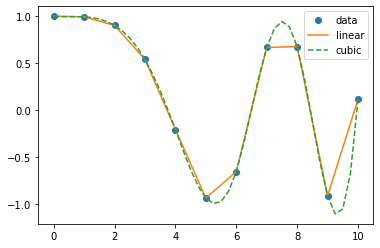

In [13]:
plt.plot(x,y,'o',xnew,f(xnew),'-',xnew,f2(xnew),'--')
plt.legend(['data', 'linear', 'cubic'], loc='best')
plt.show()

In [14]:
f(xnew)

array([ 1.        ,  0.99845838,  0.99691675,  0.99537513,  0.99383351,
        0.97108755,  0.94834159,  0.92559563,  0.90284967,  0.81221283,
        0.72157599,  0.63093915,  0.54030231,  0.35385005,  0.16739779,
       -0.01905446, -0.20550672, -0.38776657, -0.57002643, -0.75228628,
       -0.93454613, -0.86432051, -0.79409488, -0.72386925, -0.65364362,
       -0.32313274,  0.00737814,  0.33788902,  0.6683999 ,  0.67040116,
        0.67240241,  0.67440367,  0.67640492,  0.27952113, -0.11736267,
       -0.51424647, -0.91113026, -0.65452771, -0.39792516, -0.1413226 ,
        0.11527995])

In [15]:
f2(xnew)

array([ 1.        ,  0.99641099,  0.99609148,  0.99618461,  0.99383351,
        0.98618133,  0.9703712 ,  0.94354627,  0.90284967,  0.84536349,
        0.76792564,  0.66731296,  0.54030231,  0.38508734,  0.20552901,
        0.00690507, -0.20550672, -0.42403905, -0.63146643, -0.8081738 ,
       -0.93454613, -0.99267556, -0.97148292, -0.86159627, -0.65364362,
       -0.34884468,  0.00921422,  0.36635508,  0.6683999 ,  0.86795736,
        0.94478272,  0.88541793,  0.67640492,  0.32013188, -0.11762797,
       -0.55525518, -0.91113026, -1.10363376, -1.0511462 , -0.67204812,
        0.11527995])

In [16]:
x=np.linspace(0,10,num=11,endpoint=True)
y=np.cos(-x**2/9.0)
f1=interp1d(x,y,kind='nearest')
f2=interp1d(x,y,kind='previous')
f3=interp1d(x,y,kind='next')

xnew=np.linspace(0,10,num=1001,endpoint=True)

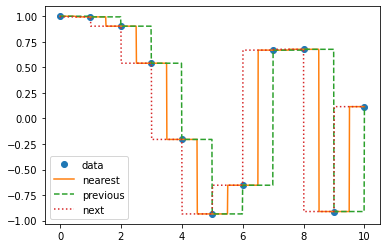

In [17]:
plt.plot(x, y, 'o')
plt.plot(xnew, f1(xnew), '-', xnew, f2(xnew), '--', xnew, f3(xnew), ':')
plt.legend(['data', 'nearest', 'previous', 'next'], loc='best')
plt.show()

In [18]:
def func(x,y,):
  return x*(1-x)*np.cos(4*np.pi*x)*np.sin(4*np.pi*y**2)**2

In [19]:
grid_x,grid_y=np.mgrid[0:1:100j,0:1:200j]

In [21]:
points=np.random.rand(1000,2)
values=func(points[:,0],points[:,1])

In [28]:
from scipy.interpolate import griddata
grid_z0=griddata(points,values,(grid_x,grid_y),method='nearest')
grid_z1=griddata(points,values,(grid_x,grid_y),method='linear')
grid_z2=griddata(points,values,(grid_x,grid_y),method='cubic')

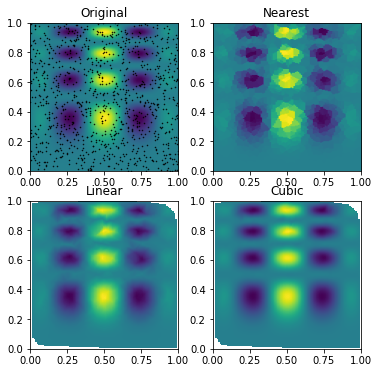

In [29]:
plt.subplot(221)
plt.imshow(func(grid_x,grid_y).T,extent=(0,1,0,1),origin='lower')
plt.plot(points[:,0], points[:,1], 'k.', ms=1)
plt.title('Original')
plt.subplot(222)
plt.imshow(grid_z0.T, extent=(0,1,0,1), origin='lower')
plt.title('Nearest')
plt.subplot(223)
plt.imshow(grid_z1.T, extent=(0,1,0,1), origin='lower')
plt.title('Linear')
plt.subplot(224)
plt.imshow(grid_z2.T, extent=(0,1,0,1), origin='lower')
plt.title('Cubic')
plt.gcf().set_size_inches(6, 6)
plt.show()

In [32]:
from scipy import interpolate
x=np.arange(0,2*np.pi+np.pi/4,2*np.pi/8)
y=np.sin(x)
tck=interpolate.splrep(x,y,s=0)

In [33]:
x

array([0.        , 0.78539816, 1.57079633, 2.35619449, 3.14159265,
       3.92699082, 4.71238898, 5.49778714, 6.28318531])

In [34]:
y

array([ 0.00000000e+00,  7.07106781e-01,  1.00000000e+00,  7.07106781e-01,
        1.22464680e-16, -7.07106781e-01, -1.00000000e+00, -7.07106781e-01,
       -2.44929360e-16])

In [35]:
tck

(array([0.        , 0.        , 0.        , 0.        , 1.57079633,
        2.35619449, 3.14159265, 3.92699082, 4.71238898, 6.28318531,
        6.28318531, 6.28318531, 6.28318531]),
 array([ 3.44265545e-18,  5.54608516e-01,  1.21921009e+00,  7.83113675e-01,
         2.45205789e-16, -7.83113675e-01, -1.21921009e+00, -5.54608516e-01,
        -2.44929360e-16,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00]),
 3)

In [37]:
xnew=np.arange(0,2*np.pi,np.pi/50)
ynew=interpolate.splev(xnew,tck,der=0)

In [38]:
xnew

array([0.        , 0.06283185, 0.12566371, 0.18849556, 0.25132741,
       0.31415927, 0.37699112, 0.43982297, 0.50265482, 0.56548668,
       0.62831853, 0.69115038, 0.75398224, 0.81681409, 0.87964594,
       0.9424778 , 1.00530965, 1.0681415 , 1.13097336, 1.19380521,
       1.25663706, 1.31946891, 1.38230077, 1.44513262, 1.50796447,
       1.57079633, 1.63362818, 1.69646003, 1.75929189, 1.82212374,
       1.88495559, 1.94778745, 2.0106193 , 2.07345115, 2.136283  ,
       2.19911486, 2.26194671, 2.32477856, 2.38761042, 2.45044227,
       2.51327412, 2.57610598, 2.63893783, 2.70176968, 2.76460154,
       2.82743339, 2.89026524, 2.95309709, 3.01592895, 3.0787608 ,
       3.14159265, 3.20442451, 3.26725636, 3.33008821, 3.39292007,
       3.45575192, 3.51858377, 3.58141563, 3.64424748, 3.70707933,
       3.76991118, 3.83274304, 3.89557489, 3.95840674, 4.0212386 ,
       4.08407045, 4.1469023 , 4.20973416, 4.27256601, 4.33539786,
       4.39822972, 4.46106157, 4.52389342, 4.58672527, 4.64955

In [ ]:
ynew

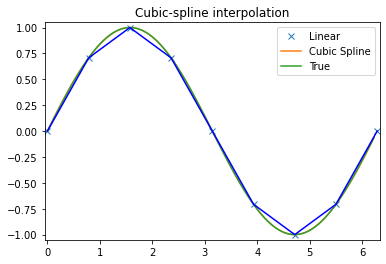

In [40]:
plt.figure()
plt.plot(x, y, 'x', xnew, ynew, xnew, np.sin(xnew), x, y, 'b')
plt.legend(['Linear', 'Cubic Spline', 'True'])
plt.axis([-0.05, 6.33, -1.05, 1.05])
plt.title('Cubic-spline interpolation')
plt.show()

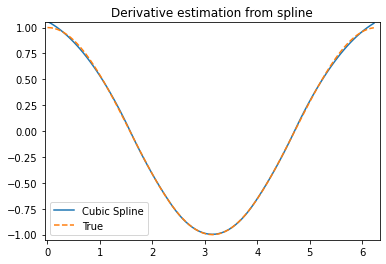

In [41]:
yder = interpolate.splev(xnew, tck, der=1)
plt.figure()
plt.plot(xnew, yder, xnew, np.cos(xnew),'--')
plt.legend(['Cubic Spline', 'True'])
plt.axis([-0.05, 6.33, -1.05, 1.05])
plt.title('Derivative estimation from spline')
plt.show()

In [42]:
def integ(x, tck, constant=-1):
  x=np.atleast_1d(x)
  out=np.zeros(x.shape,dtype=x.dtype)
  for n in range(len(out)):
    out[n]=interpolate.splint(0,x[n],tck)
  out+=constant
  return out

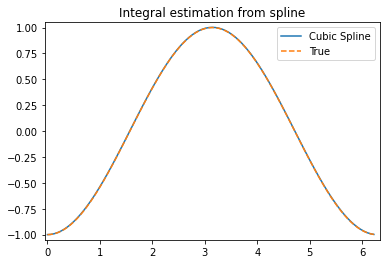

In [43]:
yint = integ(xnew, tck)
plt.figure()
plt.plot(xnew, yint, xnew, -np.cos(xnew), '--')
plt.legend(['Cubic Spline', 'True'])
plt.axis([-0.05, 6.33, -1.05, 1.05])
plt.title('Integral estimation from spline')
plt.show()

In [44]:
interpolate.sproot(tck)

array([3.14159265])

In [45]:
x=np.linspace(-np.pi/4,2*np.pi+np.pi/4,21)
y=np.sin(x)
tck=interpolate.splrep(x,y,s=0)
interpolate.sproot(tck)

array([-2.22044605e-16,  3.14159265e+00,  6.28318531e+00])

In [46]:
t=np.arange(0,1.1,.1)
x=np.sin(2*np.pi*t)
y=np.cos(2*np.pi*t)
tck,u=interpolate.splprep([x,y],s=0)

In [47]:
unew=np.arange(0,1.01,0.01)
out=interpolate.splev(unew,tck)

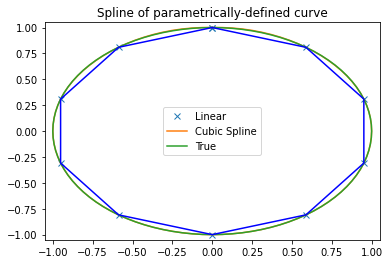

In [48]:
plt.figure()
plt.plot(x, y, 'x', out[0], out[1], np.sin(2*np.pi*unew), np.cos(2*np.pi*unew), x, y, 'b')
plt.legend(['Linear', 'Cubic Spline', 'True'])
plt.axis([-1.05, 1.05, -1.05, 1.05])
plt.title('Spline of parametrically-defined curve')
plt.show()

In [49]:
x=np.arange(0,2*np.pi+np.pi/4,2*np.pi/8)
y=np.sin(x)
s=interpolate.InterpolatedUnivariateSpline(x,y)
xnew=np.arange(0,2*np.pi,np.pi/50)
ynew=s(xnew)

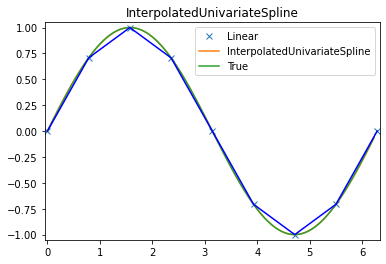

In [50]:
plt.figure()
plt.plot(x, y, 'x', xnew, ynew, xnew, np.sin(xnew), x, y, 'b')
plt.legend(['Linear', 'InterpolatedUnivariateSpline', 'True'])
plt.axis([-0.05, 6.33, -1.05, 1.05])
plt.title('InterpolatedUnivariateSpline')
plt.show()

In [52]:
t = [np.pi/2-.1, np.pi/2+.1, 3*np.pi/2-.1, 3*np.pi/2+.1]
s = interpolate.LSQUnivariateSpline(x, y, t, k=2)
ynew = s(xnew)

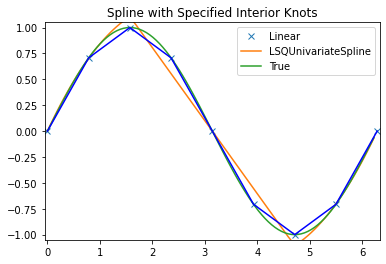

In [53]:
plt.figure()
plt.plot(x, y, 'x', xnew, ynew, xnew, np.sin(xnew), x, y, 'b')
plt.legend(['Linear', 'LSQUnivariateSpline', 'True'])
plt.axis([-0.05, 6.33, -1.05, 1.05])
plt.title('Spline with Specified Interior Knots')
plt.show()

In [54]:
x_edges, y_edges = np.mgrid[-1:1:21j, -1:1:21j]
x = x_edges[:-1, :-1] + np.diff(x_edges[:2, 0])[0] / 2.
y = y_edges[:-1, :-1] + np.diff(y_edges[0, :2])[0] / 2.
z = (x+y) * np.exp(-6.0*(x*x+y*y))

In [ ]:
x

In [ ]:
y

In [ ]:
z

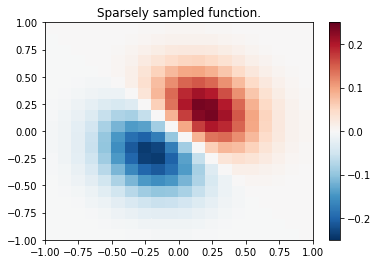

In [58]:
plt.figure()
lims = dict(cmap='RdBu_r', vmin=-0.25, vmax=0.25)
plt.pcolormesh(x_edges, y_edges, z, shading='flat', **lims)
plt.colorbar()
plt.title("Sparsely sampled function.")
plt.show()

In [60]:
xnew_edges,ynew_edges=np.mgrid[-1:1:71j,-1:1:71j]
xnew = xnew_edges[:-1, :-1] + np.diff(xnew_edges[:2, 0])[0] / 2.
ynew = ynew_edges[:-1, :-1] + np.diff(ynew_edges[0, :2])[0] / 2.
tck=interpolate.bisplrep(x,y,z,s=0)
znew=interpolate.bisplev(xnew[:,0],ynew[0,:],tck)

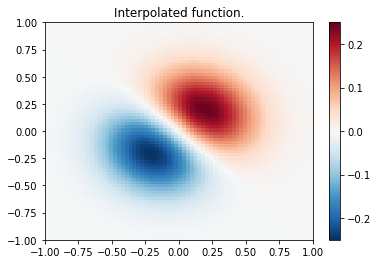

In [61]:
plt.figure()
plt.pcolormesh(xnew_edges, ynew_edges, znew, shading='flat', **lims)
plt.colorbar()
plt.title("Interpolated function.")
plt.show()

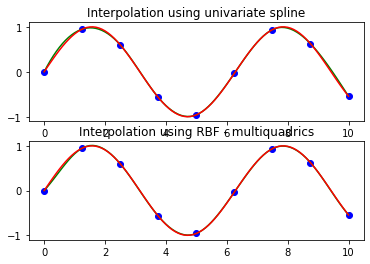

In [63]:
from scipy.interpolate import Rbf, InterpolatedUnivariateSpline

x=np.linspace(0,10,9)
y=np.sin(x)
xi=np.linspace(0,10,101)

ius=InterpolatedUnivariateSpline(x,y)
yi=ius(xi)

plt.subplot(2, 1, 1)
plt.plot(x, y, 'bo')
plt.plot(xi, yi, 'g')
plt.plot(xi, np.sin(xi), 'r')
plt.title('Interpolation using univariate spline')
# use RBF method
rbf = Rbf(x, y)
fi = rbf(xi)

plt.subplot(2, 1, 2)
plt.plot(x, y, 'bo')
plt.plot(xi, fi, 'g')
plt.plot(xi, np.sin(xi), 'r')
plt.title('Interpolation using RBF - multiquadrics')
plt.show()

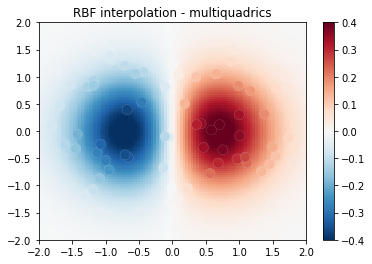

In [64]:
from matplotlib import cm

# 2-d tests - setup scattered data
x = np.random.rand(100)*4.0-2.0
y = np.random.rand(100)*4.0-2.0
z = x*np.exp(-x**2-y**2)
edges = np.linspace(-2.0, 2.0, 101)
centers = edges[:-1] + np.diff(edges[:2])[0] / 2.
XI, YI = np.meshgrid(centers, centers)

# use RBF
rbf = Rbf(x, y, z, epsilon=2)
ZI = rbf(XI, YI)

# plot the result
plt.subplot(1, 1, 1)
X_edges, Y_edges = np.meshgrid(edges, edges)
lims = dict(cmap='RdBu_r', vmin=-0.4, vmax=0.4)
plt.pcolormesh(X_edges, Y_edges, ZI, shading='flat', **lims)
plt.scatter(x, y, 100, z, edgecolor='w', lw=0.1, **lims)
plt.title('RBF interpolation - multiquadrics')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.colorbar()